In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/jjong/Desktop/vscode/kaggle_src/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


C:\Users\jjong\AppData\Local\Temp\ipykernel_9296\2552638149.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=data['age'], kde=True, palette='spring')


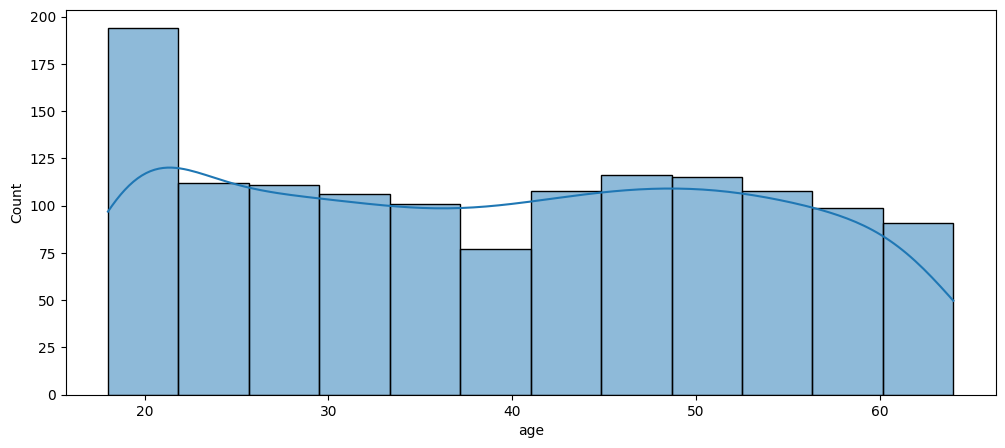

In [3]:
plt.figure(figsize=(12,5))
sns.histplot(x=data['age'], kde=True, palette='spring')
plt.show()

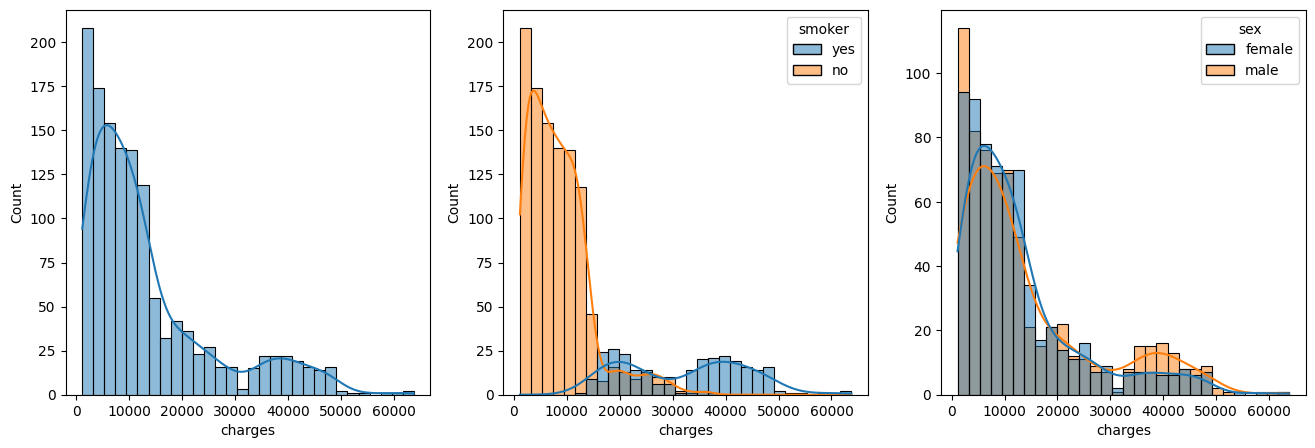

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
sns.histplot(x='charges', data=data, kde=True, ax=ax[0])
sns.histplot(x='charges', data=data, kde=True, hue='smoker', ax=ax[1])
sns.histplot(x='charges', data=data, kde=True, hue='sex', ax=ax[2])
plt.show()

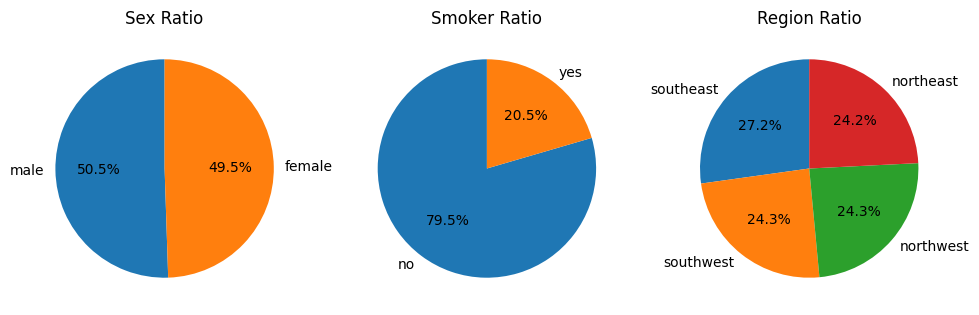

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(10,5))
axes[0].pie(x=data['sex'].value_counts(), labels=data['sex'].value_counts().index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Sex Ratio')
axes[1].pie(x=data['smoker'].value_counts(), labels=data['smoker'].value_counts().index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Smoker Ratio')
axes[2].pie(x=data['region'].value_counts(), labels=data['region'].value_counts().index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Region Ratio')
plt.tight_layout()
plt.show()

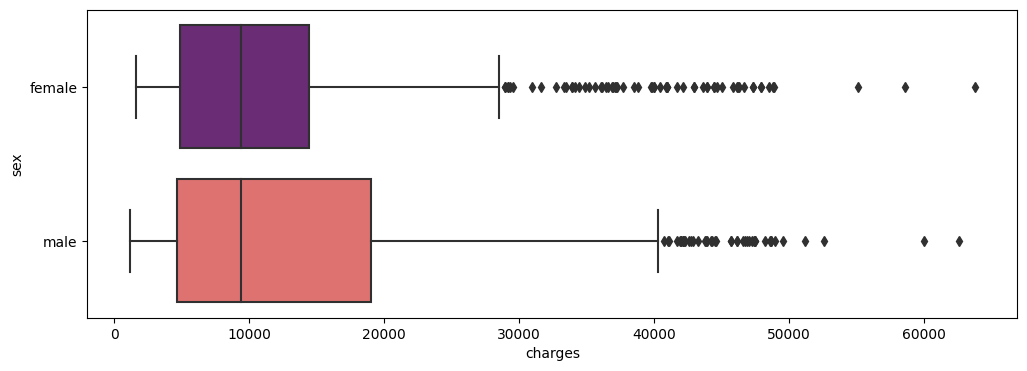

In [26]:
sex = data.groupby('sex')['charges'].mean()
plt.figure(figsize=(12,4))
sns.boxplot(y=data['sex'], x=data['charges'], palette='magma')
# plt.yscale('log')
plt.show()

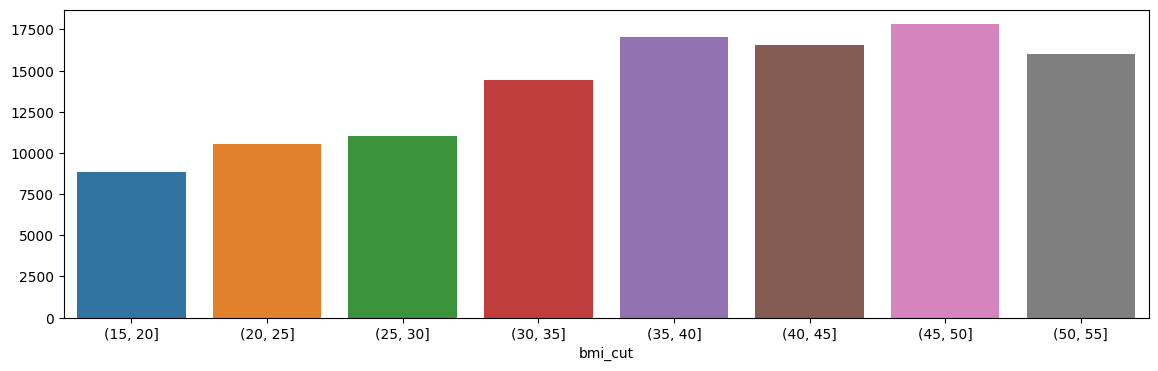

In [6]:
data['bmi_cut'] = pd.cut(data['bmi'], bins=np.arange(15, 60, 5), right=True)
bmi_cut = data.groupby('bmi_cut')['charges'].mean()
plt.figure(figsize=(14,4))
sns.barplot(x=bmi_cut.index, y=bmi_cut.values)
plt.show()

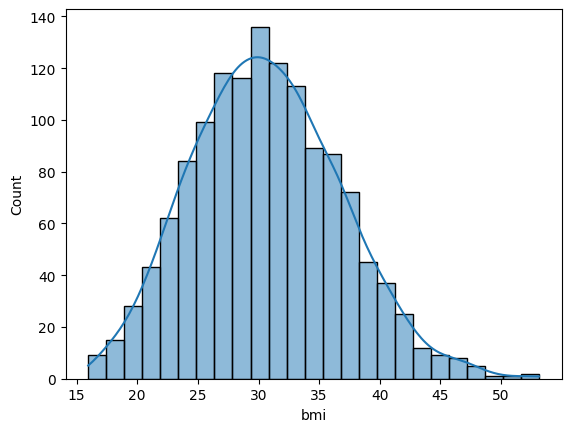

In [27]:
plt.figure()
sns.histplot(x=data['bmi'], kde=True)
plt.show()

<Figure size 640x480 with 0 Axes>

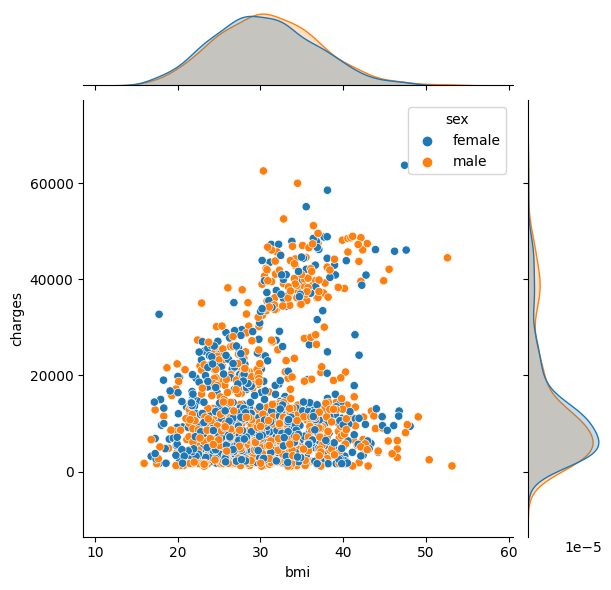

In [29]:
plt.figure()
sns.jointplot(x=data['bmi'], y=data['charges'], hue=data['sex'], color='c')
plt.show()

c:\Users\jjong\Desktop\vscode\CWNU_ICT\tensor\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

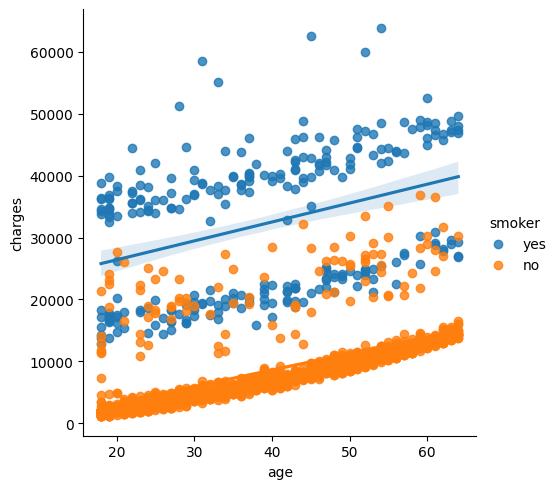

In [8]:
plt.figure()
sns.lmplot(x='age', y='charges', hue='smoker', data=data)
plt.show()

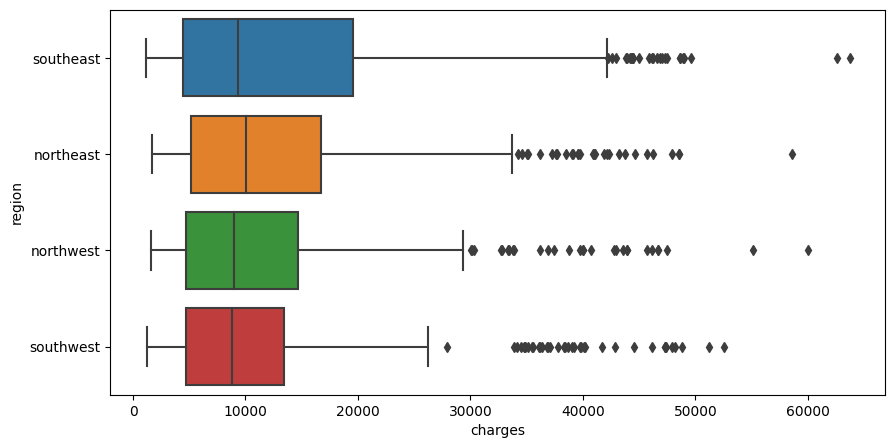

In [41]:
region_order = data.groupby('region')['charges'].mean().reset_index().sort_values(by='charges', ascending=False)['region'].tolist()
plt.figure(figsize=(10,5))
sns.boxplot(x='charges', y='region', data=data, order=region_order)
plt.show()

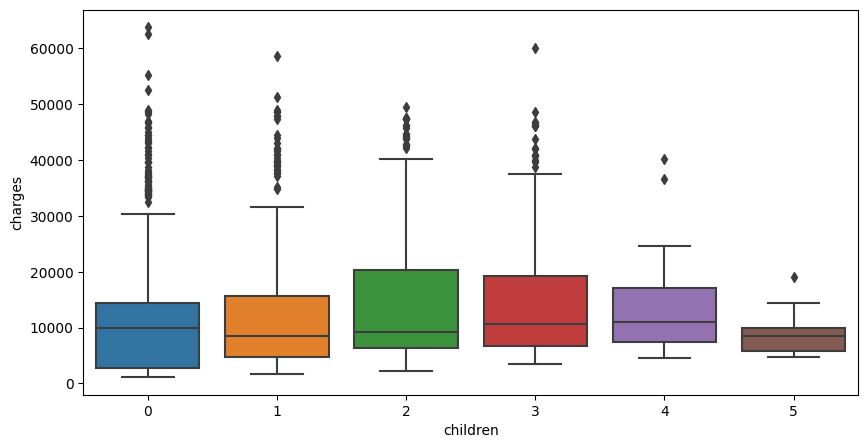

In [57]:
plt.figure(figsize=(10,5))
sns.boxplot(x='children', y='charges', data=data)
plt.show()

In [61]:
data

,age,sex,bmi,children,smoker,region,charges,bmi_cut
0,19,female,27.900,0,yes,southwest,16884.92400,"(25, 30]"
1,18,male,33.770,1,no,southeast,1725.55230,"(30, 35]"
2,28,male,33.000,3,no,southeast,4449.46200,"(30, 35]"
3,33,male,22.705,0,no,northwest,21984.47061,"(20, 25]"
4,32,male,28.880,0,no,northwest,3866.85520,"(25, 30]"
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,"(30, 35]"
1334,18,female,31.920,0,no,northeast,2205.98080,"(30, 35]"
1335,18,female,36.850,0,no,southeast,1629.83350,"(35, 40]"
1336,21,female,25.800,0,no,southwest,2007.94500,"(25, 30]"
